## 1. Data preparation

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data from the .csv file
path = "nci_var_filtered.csv"
df = pd.read_csv(path, sep = "\t")
df.head()

,gene,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
0,A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
1,A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
2,A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
3,A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
4,AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [3]:
# setting the gene name as the index of the dataframe
df = df.set_index("gene")
df.head()

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [4]:
print(df.shape)

(9994, 60)


In [5]:
# getting all of the gene names
genes = list(df.index.values)
# printing some of them
print(*genes[0:20])

A1BG A2M A2ML1 A4GALT AAAS AACS AADAC AAED1 AAGAB AAMP AAR2 AARS AARS2 AASDH AASDHPPT AATK ABAT ABCA2 ABCA3 ABCA6


In [6]:
# getting all of the cell lines
cells = list(df.columns.values)
# printing them
print(*cells)

786-0 A498 A549 ACHN BT-549 CAKI-1 CCRF-CEM COLO205 DU-145 EKVX HCC-2998 HCT-116 HCT-15 HL-60 HOP-62 HOP-92 HS-578T HT29 IGR-OV1 K-562 KM12 LOX-IMVI M14 MALME-3M MCF7 MDA-MB-231 MDA-MB-435 MDA-MB-468 MOLT-4 NCI-ADR-RES NCI-H226 NCI-H23 NCI-H322M NCI-H460 NCI-H522 OVCAR-3 OVCAR-4 OVCAR-5 OVCAR-8 PC-3 RPMI-8226 RXF-393 SF-268 SF-295 SF-539 SK-MEL-2 SK-MEL-28 SK-MEL-5 SK-OV-3 SN12C SNB-19 SNB-75 SR SW-620 T-47D TK-10 U251 UACC-257 UACC-62 UO-31


In [7]:
# Checking if there are null values
print(np.any(df.isna().sum() > 0))

False


There are no null values, so we don't need to worry about that.

In [8]:
# Transposing the dataframe so the genes are the columns (features) and the cell lines are the rows (samples)
# df is the original dataframe, data is the transposed one, I will use data (the transposed one) from here onwards
data = df.T.rename_axis("Cell", axis = 0).rename_axis('Gene', axis = 1)
data.head()

Gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
Cell,,,,,,,,,,,,,,,,,,,,,
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,...,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,...,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,...,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,...,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,...,0.306154,0.702246,0.752123,0.465908,0.887554,-0.199754,-0.083538,-0.785677,-0.773108,0.586292


In [9]:
print(data.shape) # 60 samples, 9994 features

(60, 9994)


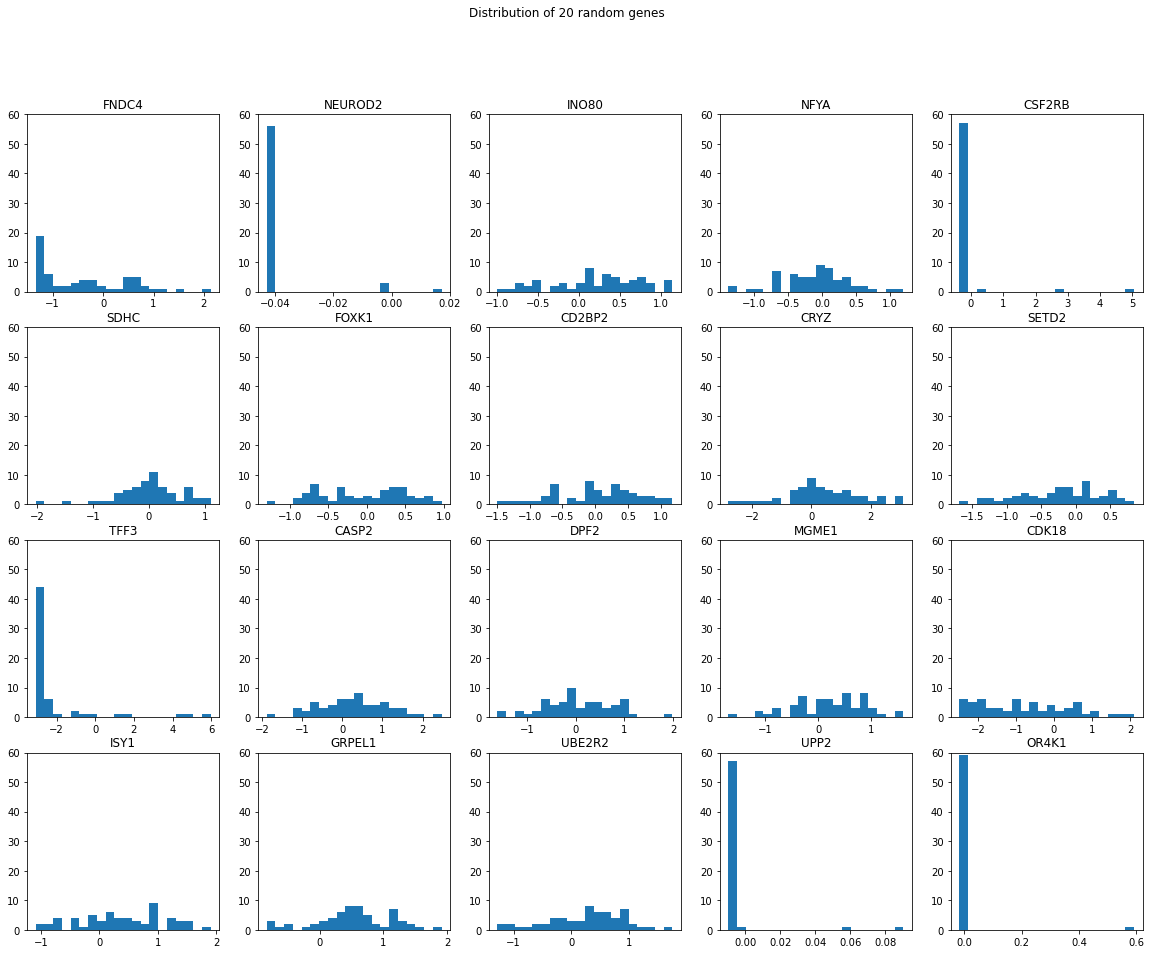

In [10]:
# examining the distribution of the data
# I can't plot 9994 graphs, so I will choose 20 genes at random
fig, axes = plt.subplots(figsize = (20, 15), ncols = 5, nrows = 4)
plt.suptitle("Distribution of 20 random genes")
np.random.seed(125)
for i, rnd_num in enumerate((np.random.randint(0, data.shape[1], size = 20))):
    x_pos = i // 5
    y_pos = i % 5
    axes[x_pos, y_pos].hist(data.iloc[:, rnd_num], bins = 20)
    axes[x_pos, y_pos].set_ylim((0, data.shape[0]))
    axes[x_pos, y_pos].set_title(genes[rnd_num])
fig;

In [11]:
data.describe()

Gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.508190,-0.457656,-1.573562,-0.079323,0.607551,-0.247923,-0.663990,0.501797,0.013349,-0.186690,...,0.080154,-0.033921,0.229956,0.421741,1.219054,-0.097587,0.066295,-0.347177,-0.337274,0.226292
std,1.073057,2.113886,0.491603,1.527735,0.698374,0.677511,0.388864,0.948635,0.449513,0.685752,...,0.634033,0.684767,0.458151,0.674010,0.508006,0.558743,0.627380,0.528663,0.729063,0.554981
min,-1.025477,-1.409323,-1.696062,-2.241323,-1.071615,-2.114923,-0.809323,-2.480369,-0.820985,-2.068523,...,-1.153846,-1.547754,-0.617877,-1.234092,-0.022446,-1.389754,-2.013538,-1.475677,-2.603108,-1.153708
25%,-0.675477,-1.399323,-1.696062,-1.581323,0.135885,-0.652423,-0.809323,0.097131,-0.380985,-0.518523,...,-0.386346,-0.517754,-0.067877,-0.039092,0.895054,-0.384754,-0.238538,-0.723177,-0.693108,-0.213708
50%,0.584523,-1.369323,-1.696062,-0.021323,0.798385,-0.264923,-0.809323,0.654631,0.079015,-0.123523,...,0.086154,-0.002754,0.197123,0.450908,1.257554,-0.129754,0.046462,-0.335677,-0.223108,0.336292
75%,1.414523,-1.196823,-1.636062,1.126177,1.110885,0.145077,-0.779323,1.182131,0.301515,0.181477,...,0.426154,0.414746,0.484623,0.883408,1.577554,0.192746,0.413962,0.069323,0.066892,0.643792
max,2.754523,6.620677,1.733938,3.008677,1.968385,1.395077,0.880677,1.949631,0.939015,1.281477,...,1.636154,1.472246,1.372123,1.775908,2.227554,1.870246,1.666462,0.694323,1.366892,1.166292


Creating a dictionary with the tissue related to each cell, from the webpage: https://dtp.cancer.gov/discovery_development/nci-60/cell_list.htm

In [12]:
cell_tissues = {"CCRF-CEM": "Leukemia",
                "HL-60": "Leukemia",
                "K-562": "Leukemia",
                "MOLT-4": "Leukemia",
                "RPMI-8226": "Leukemia",
                "SR": "Leukemia",
                "A549": "Non-Small_Cell_Lung",
                "EKVX": "Non-Small_Cell_Lung",
                "HOP-62": "Non-Small_Cell_Lung",
                "HOP-92": "Non-Small_Cell_Lung",
                "NCI-H226": "Non-Small_Cell_Lung",
                "NCI-H23": "Non-Small_Cell_Lung",
                "NCI-H322M": "Non-Small_Cell_Lung",
                "NCI-H460": "Non-Small_Cell_Lung",
                "NCI-H522": "Non-Small_Cell_Lung",
                "COLO205": "Colon",
                "HCC-2998": "Colon",
                "HCT-116": "Colon",
                "HCT-15": "Colon",
                "HT29": "Colon",
                "KM12": "Colon",
                "SW-620": "Colon",
                "SF-268": "CNS",
                "SF-295": "CNS",
                "SF-539": "CNS",
                "SNB-19": "CNS",
                "SNB-75": "CNS",
                "U251": "CNS",
                "LOX-IMVI": "Melanoma",
                "MALME-3M": "Melanoma",
                "M14": "Melanoma",
                "MDA-MB-435": "Melanoma",
                "SK-MEL-2": "Melanoma",
                "SK-MEL-28": "Melanoma",
                "SK-MEL-5": "Melanoma",
                "UACC-257": "Melanoma",
                "UACC-62": "Melanoma",
                "IGR-OV1": "Ovarian",
                "OVCAR-3": "Ovarian",
                "OVCAR-4": "Ovarian",
                "OVCAR-5": "Ovarian",
                "OVCAR-8": "Ovarian",
                "NCI-ADR-RES": "Ovarian",
                "SK-OV-3": "Ovarian",
                "786-0": "Renal",
                "A498": "Renal",
                "ACHN": "Renal",
                "CAKI-1": "Renal",
                "RXF-393": "Renal",
                "SN12C": "Renal",
                "TK-10": "Renal",
                "UO-31": "Renal",
                "PC-3": "Prostate",
                "DU-145": "Prostate",
                "MCF7": "Breast",
                "MDA-MB-231": "Breast",
                "MDA-MB-468": "Breast",
                "HS-578T": "Breast",
                "MDA-N": "Breast",
                "BT-549": "Breast",
                "T-47D": "Breast",
                }

In [13]:
print(set(cell_tissues.values()))

{'CNS', 'Breast', 'Melanoma', 'Non-Small_Cell_Lung', 'Renal', 'Prostate', 'Colon', 'Leukemia', 'Ovarian'}


There are 9 different tissues.

## 2. Hierarchical clustering

a. Create several dendrograms by varying the method used (e.g. single linkage, or ward's method) and the distance metric (e.g. 'euclidean')

b. Analyse the results to answer the following questions:

    i. What does each group mean?

    ii. What does each level mean?
    
    iii. How does the method or the distance influence?

-------------------------------------------------------

There are multiple linkage methods: I will try single, complete, average and Ward's.

There are multiple distance metrics: I will try Euclidean, Manhattan (Cityblock) and Chebyshev.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Performing the hierarchical agglomerative clustering with the different metric / method combinations, using linkage from scipy:

In [15]:
linked_Euclidean_single = linkage(data, metric='euclidean', method='single')
linked_Manhattan_single = linkage(data, metric='cityblock', method='single')
linked_Chebyshev_single = linkage(data, metric='chebyshev', method='single')
linked_Euclidean_complete = linkage(data, metric='euclidean', method='complete')
linked_Manhattan_complete = linkage(data, metric='cityblock', method='complete')
linked_Chebyshev_complete = linkage(data, metric='chebyshev', method='complete')
linked_Euclidean_average = linkage(data, metric='euclidean', method='average')
linked_Manhattan_average = linkage(data, metric='cityblock', method='average')
linked_Chebyshev_average = linkage(data, metric='chebyshev', method='average')
linked_Euclidean_ward = linkage(data, metric='euclidean', method='ward') # ward requires distance metric to be euclidean

Plotting the dendrograms:

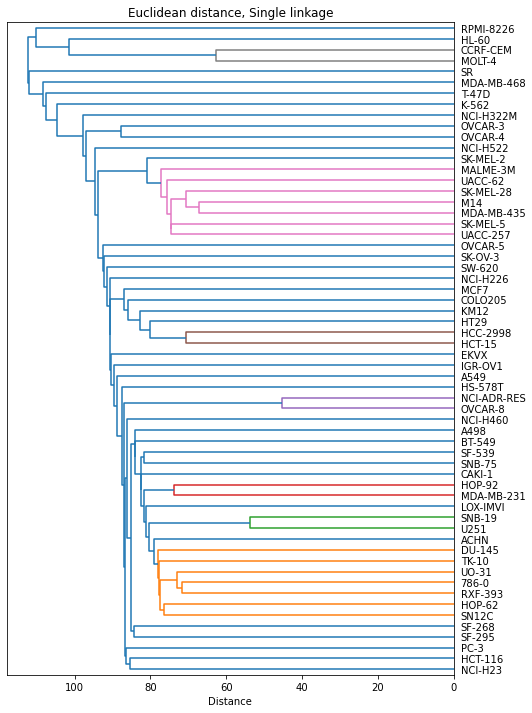

In [16]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Euclidean_single,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.title("Euclidean distance, Single linkage")
plt.xlabel("Distance")
plt.show()  

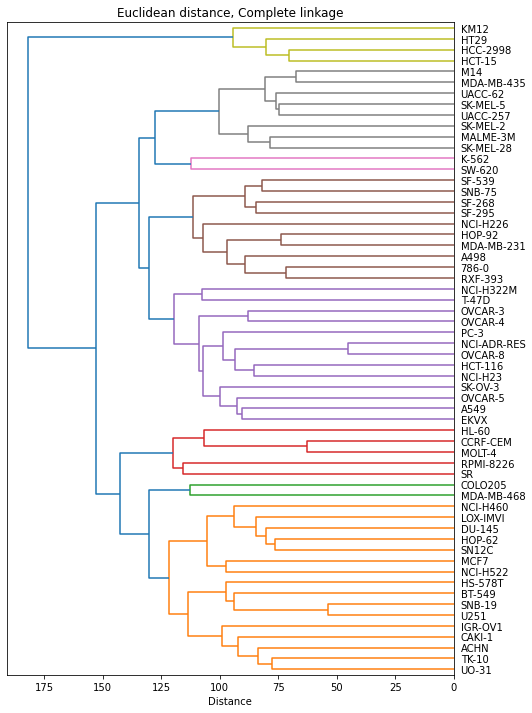

In [17]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Euclidean_complete,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Euclidean distance, Complete linkage")
plt.show()  

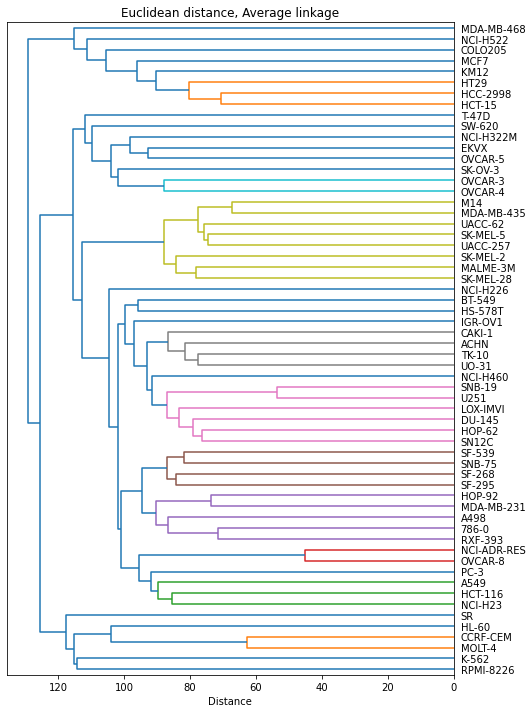

In [18]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Euclidean_average,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Euclidean distance, Average linkage")
plt.show()  

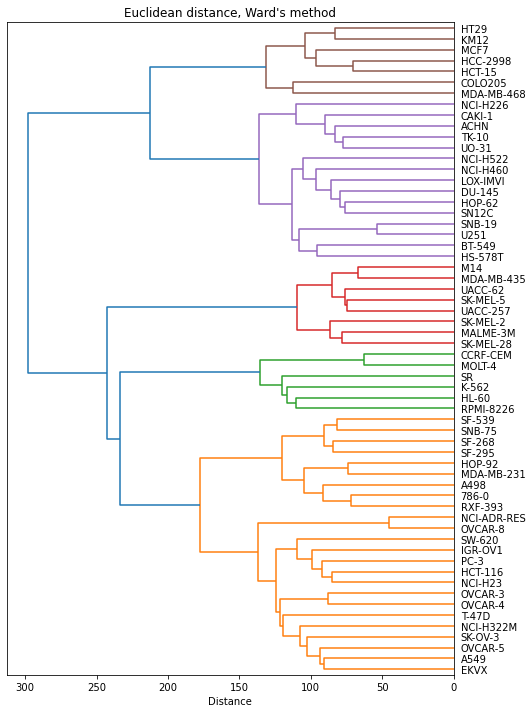

In [19]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Euclidean_ward,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Euclidean distance, Ward's method")
plt.show()  

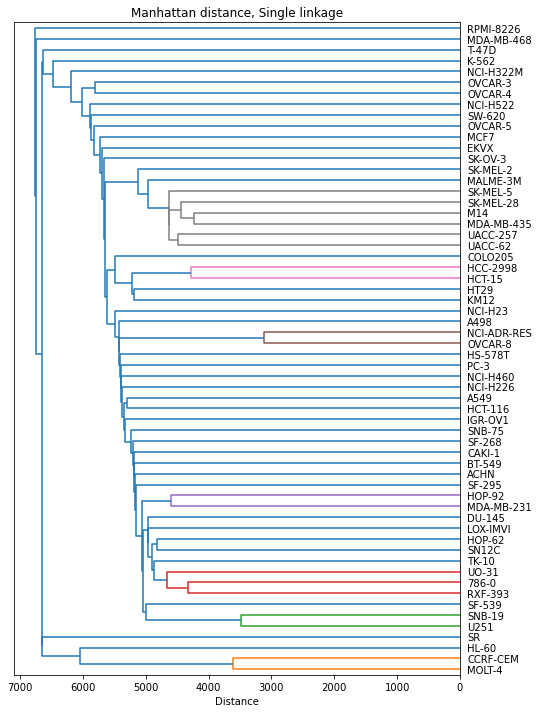

In [20]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Manhattan_single,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.title("Manhattan distance, Single linkage")
plt.xlabel("Distance")
plt.show()  

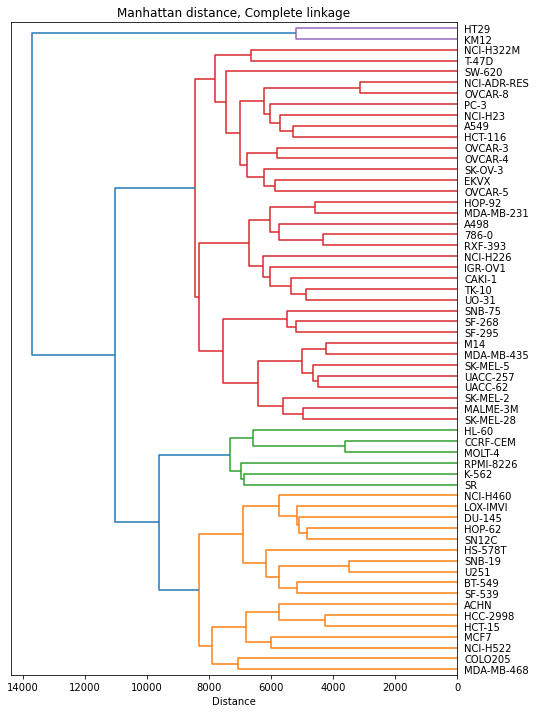

In [21]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Manhattan_complete,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Manhattan distance, Complete linkage")
plt.show()  

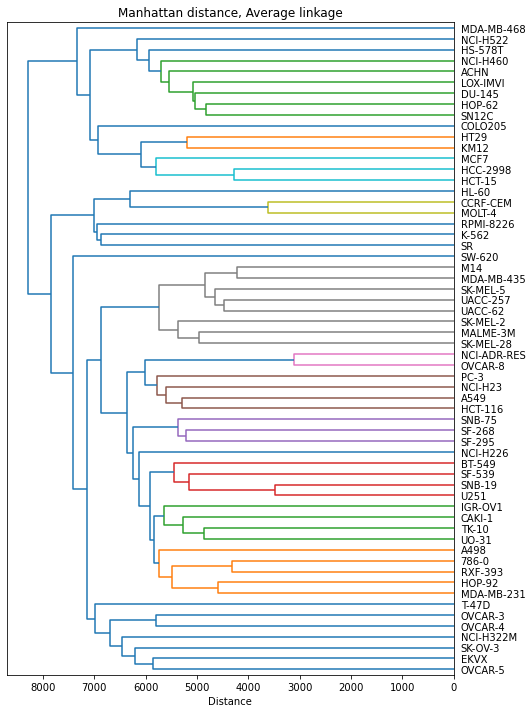

In [22]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Manhattan_average,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Manhattan distance, Average linkage")
plt.show()  

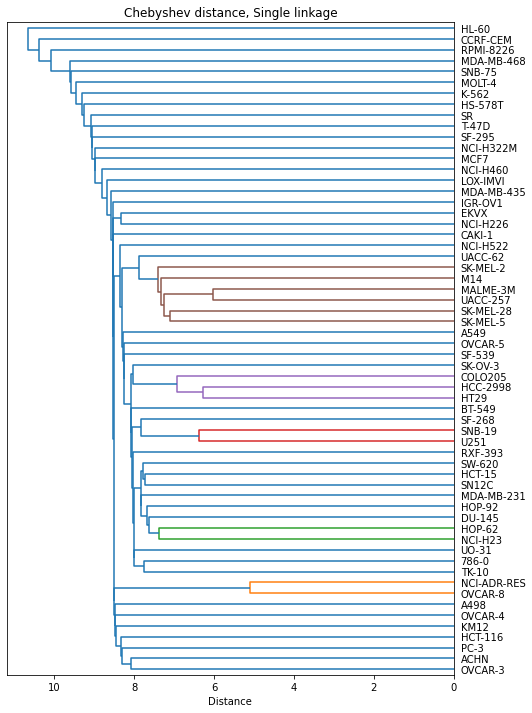

In [23]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Chebyshev_single,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.title("Chebyshev distance, Single linkage")
plt.xlabel("Distance")
plt.show()  

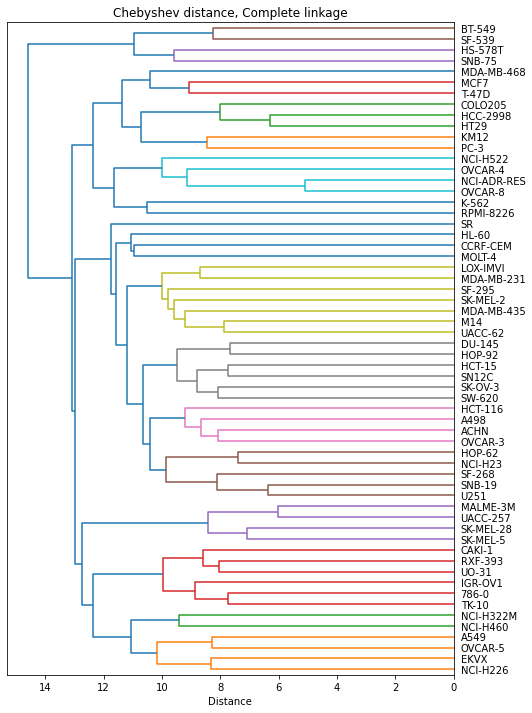

In [24]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Chebyshev_complete,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Chebyshev distance, Complete linkage")
plt.show()  

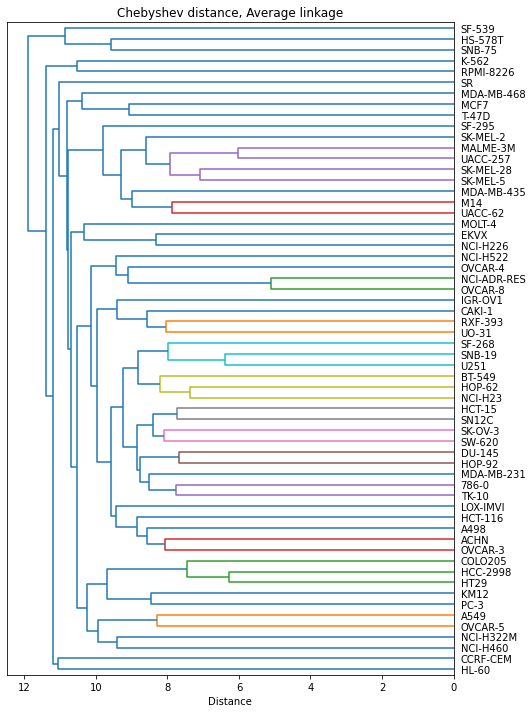

In [25]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Chebyshev_average,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10)
plt.xlabel("Distance")
plt.title("Chebyshev distance, Average linkage")
plt.show()  

#### Best dendrogram

Best dendrogram (according to my criteria): Euclidean distance, Ward's method

Even though scipy only considers there are 5 clusters (5 different colors), I consider it is more appropriate to have 6: I would split the cluster in the bottom into two different clusters. This is the same as to say I would take a threshold distance of 150, which gives those 6 clusters.

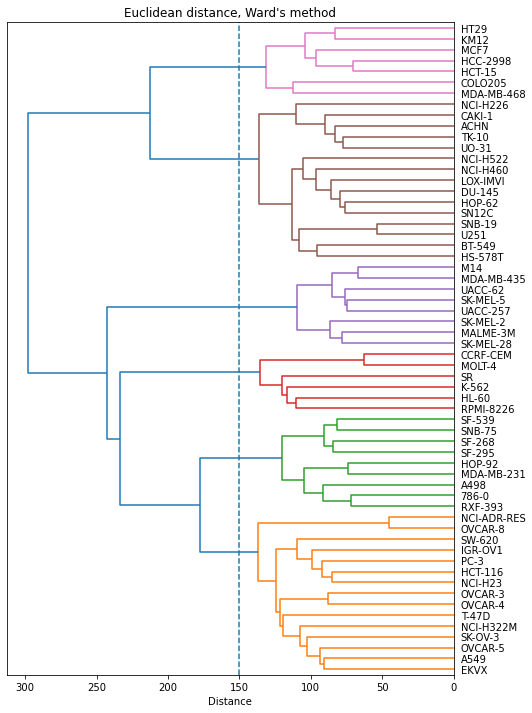

In [26]:
plt.figure(figsize=(8, 12))  
dendrogram(linked_Euclidean_ward,  
            orientation='left',
            labels=data.index,
            distance_sort='descending',
            leaf_font_size = 10,
            color_threshold = 150)
plt.xlabel("Distance")
plt.title("Euclidean distance, Ward's method")
plt.axvline(150, linestyle = "dashed")
plt.show()  

Performing agglomerative clustering with sklearn using those methods/metrics:

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
# 6 clusters, Euclidean distance, ward method
cluster_Euclidean_ward_6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster_Euclidean_ward_6.fit(data.values)
cluster_labels = cluster_Euclidean_ward_6.labels_

Visualizing the clustering in those cases, using PCA to be able to represent the points in 2D (because the samples have 9994 features, can't visualize them otherwise). Performing a scaling of the data prior to performing the PCA.

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA(n_components=2, random_state = 125)
scaler_pca = Pipeline(steps=[('pca', pca), ('scaler', scaler)])
reduced_data = scaler_pca.fit_transform(data)
#reduced_data = scaler_pca.transform(data)
print(scaler_pca.named_steps['pca'].explained_variance_ratio_)
print(np.sum(scaler_pca.named_steps['pca'].explained_variance_ratio_))

[0.17449458 0.08729669]
0.26179127199061925


26% of the variance is explained by the first two components, it is a small amount, but it allows us to represent 9994 dimensional data projected into 2D

With the different labels:

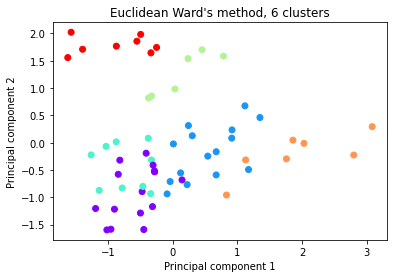

In [30]:
    plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster_labels, cmap="rainbow")
    plt.title("Euclidean Ward's method, 6 clusters")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.show();

We can see that in some cases (bottom left), there are some overlapping clusters (purple-ish and aquamarine): this representation only takes into account the 26% of the variability of the data, it is not a perfect representation, it's just to get an idea. Probably ww would need different principal components to see separation of those clusters.

##### Tissue of origin

To check which cells are in each cluster and which tissues are these cells from:

In [31]:
    from collections import Counter
    cluster_labels = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(data.values).labels_
    for i in range(max(cluster_labels) + 1):
        print("Cluster", i)
        indices = np.where(cluster_labels == i)
        cell_names = data.index[indices]
        tissues = [cell_tissues[cell_name] for cell_name in cell_names]
        tissue_counter = Counter(tissues)
        print("Cells in cluster", i, ":", cell_names.values)
        print("Tissues:", tissue_counter)
        print("")

Cluster 0
Cells in cluster 0 : ['A549' 'EKVX' 'HCT-116' 'IGR-OV1' 'NCI-ADR-RES' 'NCI-H23' 'NCI-H322M'
 'OVCAR-3' 'OVCAR-4' 'OVCAR-5' 'OVCAR-8' 'PC-3' 'SK-OV-3' 'SW-620' 'T-47D']
Tissues: Counter({'Ovarian': 7, 'Non-Small_Cell_Lung': 4, 'Colon': 2, 'Prostate': 1, 'Breast': 1})

Cluster 1
Cells in cluster 1 : ['ACHN' 'BT-549' 'CAKI-1' 'DU-145' 'HOP-62' 'HS-578T' 'LOX-IMVI'
 'NCI-H226' 'NCI-H460' 'NCI-H522' 'SN12C' 'SNB-19' 'TK-10' 'U251' 'UO-31']
Tissues: Counter({'Renal': 5, 'Non-Small_Cell_Lung': 4, 'Breast': 2, 'CNS': 2, 'Prostate': 1, 'Melanoma': 1})

Cluster 2
Cells in cluster 2 : ['786-0' 'A498' 'HOP-92' 'MDA-MB-231' 'RXF-393' 'SF-268' 'SF-295' 'SF-539'
 'SNB-75']
Tissues: Counter({'CNS': 4, 'Renal': 3, 'Non-Small_Cell_Lung': 1, 'Breast': 1})

Cluster 3
Cells in cluster 3 : ['CCRF-CEM' 'HL-60' 'K-562' 'MOLT-4' 'RPMI-8226' 'SR']
Tissues: Counter({'Leukemia': 6})

Cluster 4
Cells in cluster 4 : ['COLO205' 'HCC-2998' 'HCT-15' 'HT29' 'KM12' 'MCF7' 'MDA-MB-468']
Tissues: Counter({'Colon

We see the cells in each cluster are the same that appear in the dendrogram, and that it is able to isolate very well melanoma cells (all of them are in one cluster, 5, with nothing else), and leukemia cells (same as melanoma, cluster 3). Most colon cancer cells are also in one cluster (4), although with some breast cancer cells. The other three clusters contain a mix of tissues, but for example cluster 1 contains every ovarian cell, and cluster 2 contains most CNS cells.

So hierarchical agglomerative clustering with Euclidean distance, Ward's method, and 6 clusters, is able to divide in some cases the cells from different tissues into different clusters, but not in every case, and not perfectly.

## 3. Partitional clustering

a. Performs some K-means clustering by varying the number of clusters (i.e. k)

b. Build an Elbow plot to gauge the number of clusters (k)

    i. What is the most appropriate number of groups? 

    ii. Why?

c. Calculate the Silhouette score to measure cluster compactness and cluster separation

    i. What is the highest Silhouette score?

    ii. Considering the scores, what can you conclude?

d. Analyse the results to answer the following questions:

    i. How many clusters should we have?
    
    ii. Does cluster assignment match tissue of origin?

--------------------------------

#### K-means with different number of clusters

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We have 60 samples, from 9 different tissues. I will try a number of clusters k from 1 to 19.

Performing kmeans for the different k:

I calculate the SSW (sum of squares within) using the attribute inertia_ of the model, and I calculate the silhouette score in general using the function silhouette_score. I will afterwards calculate the silhouette score individually.

In [33]:
num_clusters = list(range(1, 20)) # from 1 to 19
kmeans_scores = pd.DataFrame(columns = ["k", "SSW", "Silhouette"]) # store the scores
kmeans_models = {} # store the models
kmeans_labels = {} # store the labels
for k in num_clusters:
  # n_init = 20 to increase the number of initializations and try to avoid bad results due to bad initializations
  model = KMeans(n_clusters = k, random_state = 125, n_init = 20)
  model.fit(data)
  label = model.predict(data)
  sil_score = silhouette_score(data, label) if k > 1 else None # can't calculate Silhouette score with 1 cluster
  ssw = model.inertia_ # Inertia: SSW, sum of squares within the cluster
  kmeans_scores = kmeans_scores.append({"k": k, "SSW": ssw, "Silhouette": sil_score}, ignore_index=True)
  kmeans_models[str(k)] = model
  kmeans_labels[str(k)] = label
  

Seeing the scores:

In [34]:
kmeans_scores # The scores for each number of clusters k

,k,SSW,Silhouette
0,1.0,398272.056210,NaN
1,2.0,350578.776510,0.105061
2,3.0,319569.496501,0.105457
3,4.0,296106.468567,0.120544
4,5.0,275632.035777,0.102086
5,6.0,258820.324873,0.098345
6,7.0,250183.033769,0.095233
7,8.0,243508.355091,0.098639
8,9.0,236684.620011,0.087227
9,10.0,228772.375658,0.081704


#### Elbow plot

K means tries to minimise the SSW. To gauge which is the optimal number of clusters, I will use the elbow plot. This plot only takes into account the SSW, a measure of the cohesion of the clusters. The greater the cohesion, the smaller the SSW. 

The optimal number of clusters, according to this plot, is the point at which, if we increase the number of clusters, the SSW improves notably less than in the previous step. In other words, we should choose a number of clusters where adding an extra cluster doesn't improve much the performance (in terms of SSW) of the clustering algorithm.

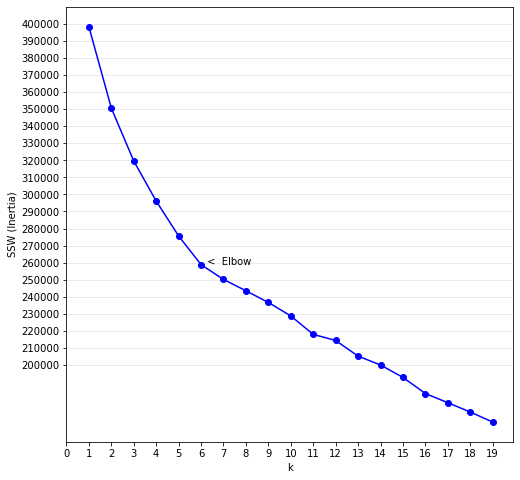

In [35]:
plt.figure(figsize=(8, 8))
plt.plot(num_clusters, kmeans_scores.SSW, "bo-")
plt.xlabel("k")
plt.ylabel("SSW (Inertia)")
plt.xticks(range(0, 20))
plt.yticks(range(200000, 410000, 10000))
plt.annotate('  <  Elbow', xy=(6, kmeans_scores.SSW[5]))
plt.grid(axis="y", alpha = 0.3)
plt.show()

The point at k = 6 is the point with the largest reduction in improvement afterwards (from k = 5 to k = 6 there has been an improvement of approx. 20000, and from k = 6 to k = 7, approx. 10000), so this could be considered the elbow.

So, according to the elbow plot (which takes into account the SSW), the optimal k is 6.

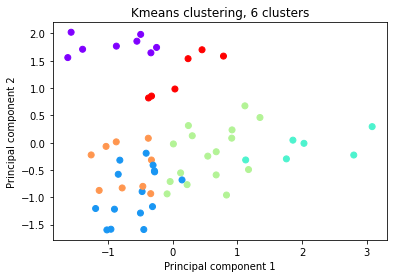

In [36]:
# Visualizing it
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=kmeans_labels["6"], cmap="rainbow")
plt.title("Kmeans clustering, 6 clusters")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

#### Silhouette score

Using the silhouette score calculated before:

In [37]:
kmeans_scores[["k", "Silhouette"]]

,k,Silhouette
0,1.0,NaN
1,2.0,0.105061
2,3.0,0.105457
3,4.0,0.120544
4,5.0,0.102086
5,6.0,0.098345
6,7.0,0.095233
7,8.0,0.098639
8,9.0,0.087227
9,10.0,0.081704


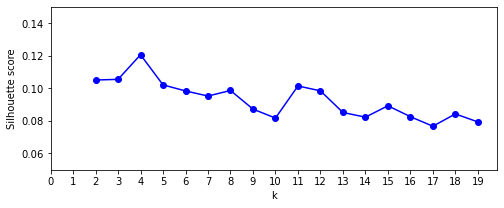

In [38]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), kmeans_scores.Silhouette[1:] , "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.ylim((0.05, 0.15))
plt.xticks(range(20))
plt.show()

The best score is in k = 4 (silhouette score 0.12). This is very low, considering the maximum for the silhouette score is 1. So the clusters are not very compact and separated.

To have a better picture, I will create the silhouette diagrams, plotting the silhouette coefficient of each sample, grouped by the cluster they're in, and sorted in descending order of scores.

The vertical line is the threshold, or the average silhouette score (the one calculated above).

To the right, i will visualize the data using the PCA, and I will plot the kmeans prototypes (the centroids, cluster_centers_), also through the PCA.

For n_clusters = 2 The average silhouette_score is : 0.1050609199531273
For n_clusters = 3 The average silhouette_score is : 0.1054571642387354
For n_clusters = 4 The average silhouette_score is : 0.12054380018205509
For n_clusters = 5 The average silhouette_score is : 0.10208601772274079
For n_clusters = 6 The average silhouette_score is : 0.09834452798581418
For n_clusters = 7 The average silhouette_score is : 0.09523277303061588
For n_clusters = 8 The average silhouette_score is : 0.09863901496072176
For n_clusters = 9 The average silhouette_score is : 0.08722724645440423


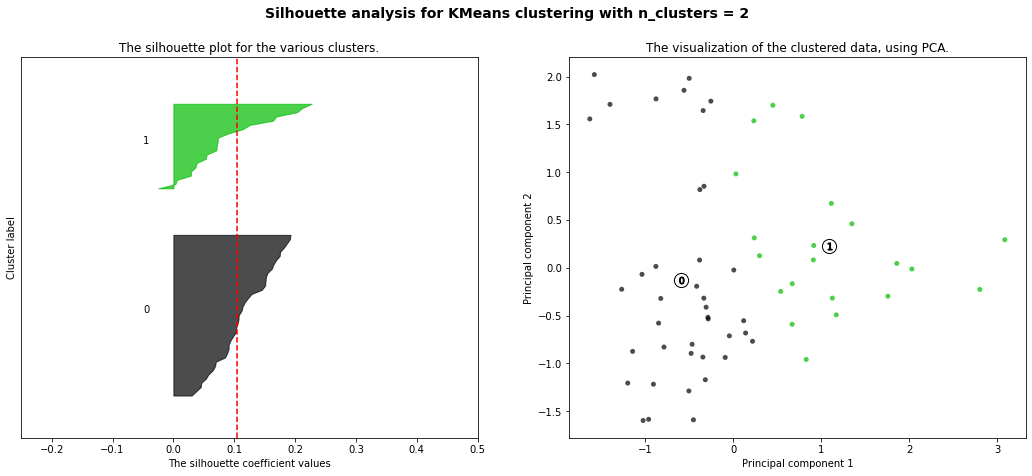

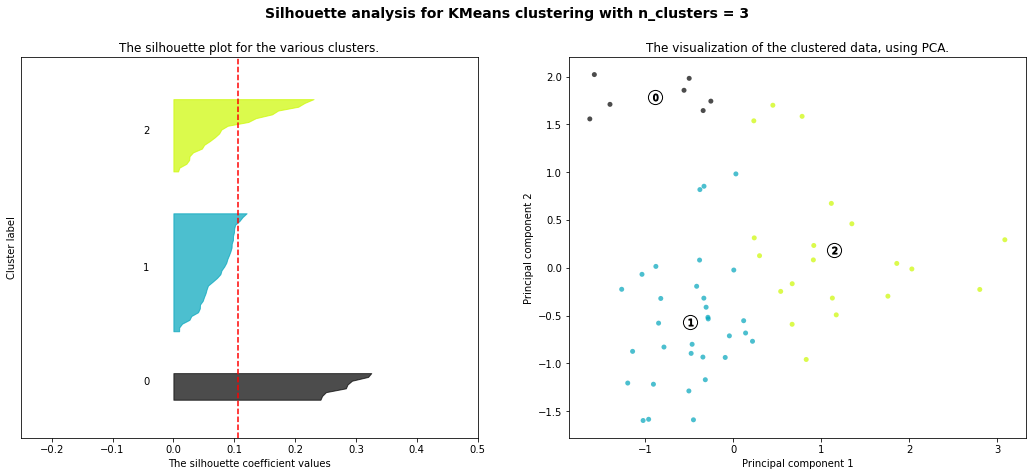

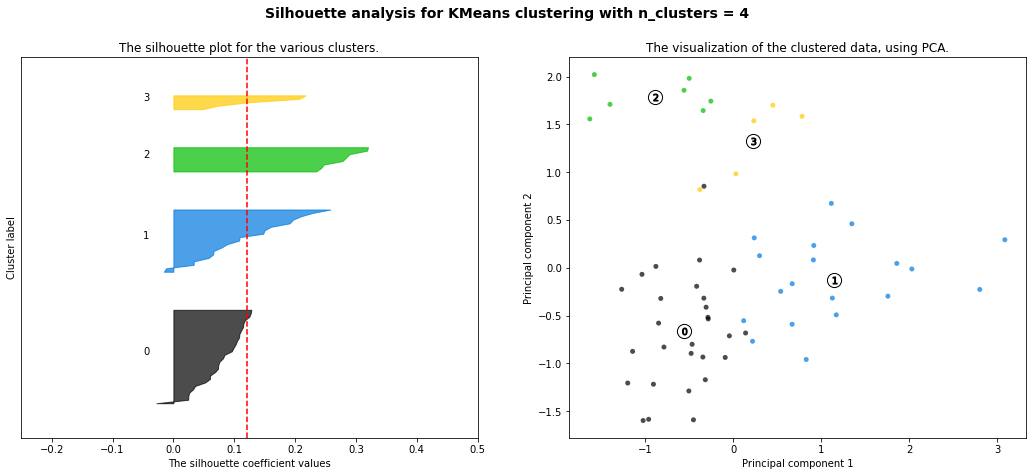

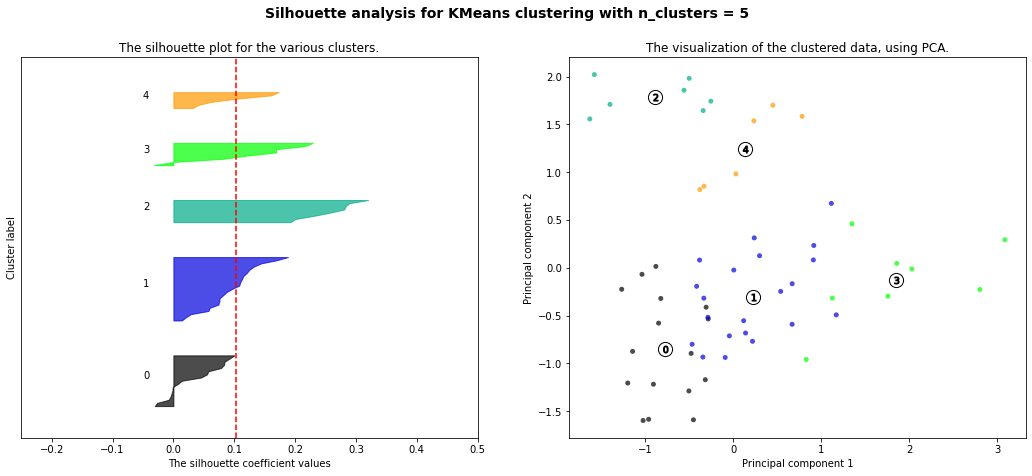

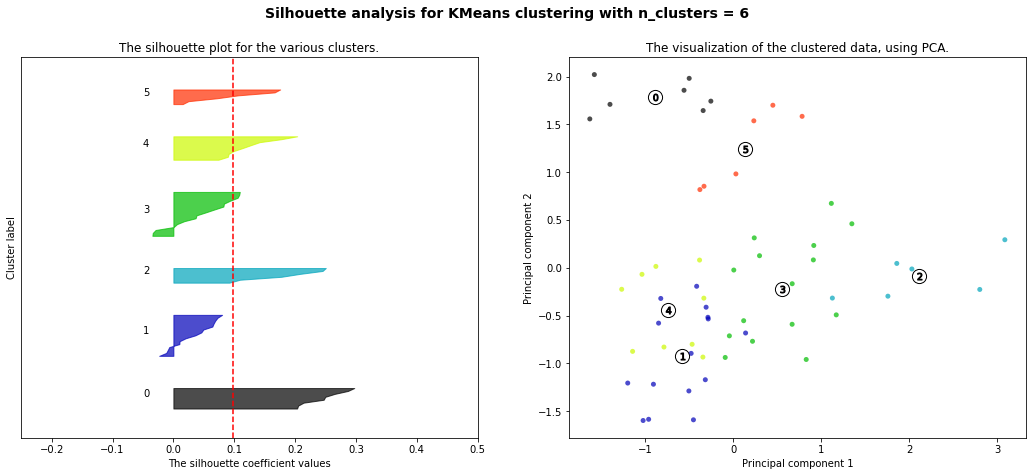

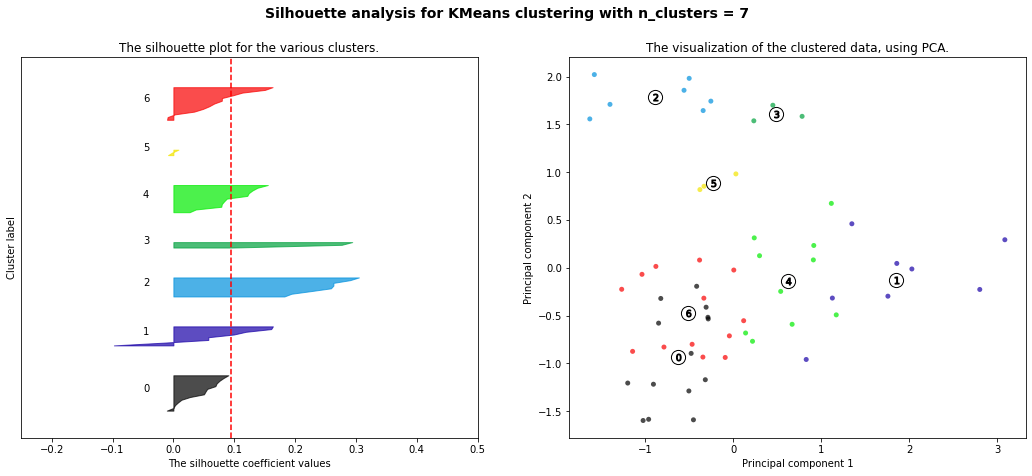

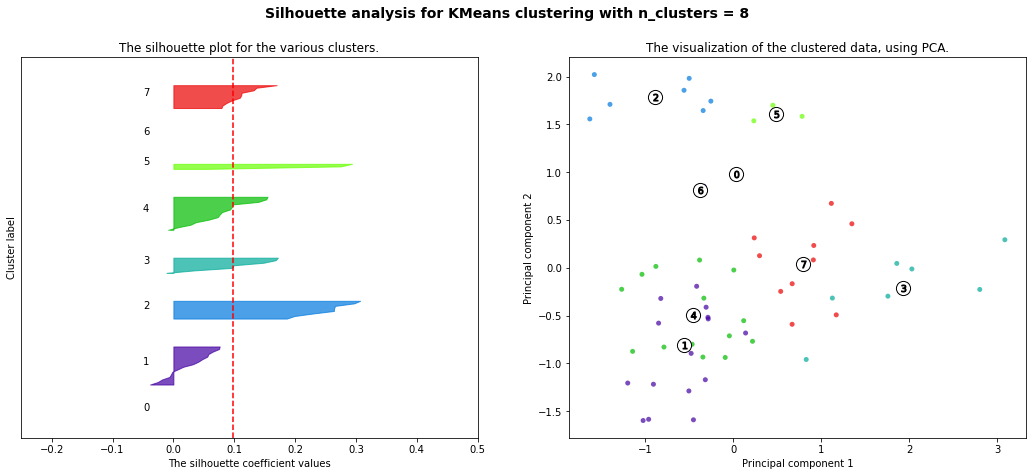

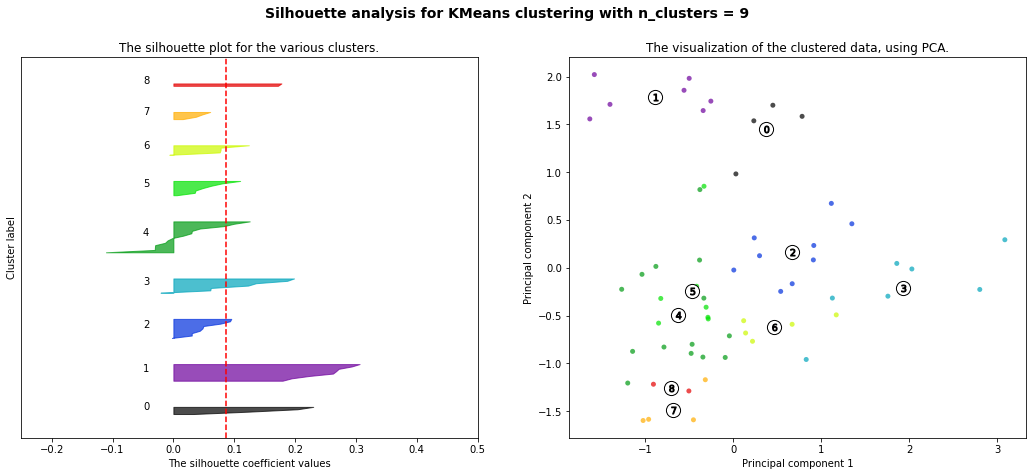

In [39]:
# adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
X = data
range_n_clusters = [i for i in range(2, 10)] # let's see from 2 to 10
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.25, 0.5]) # for better visualization
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    cluster_labels = kmeans_labels[str(n_clusters)] # getting the labels

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        reduced_data[:,0], reduced_data[:,1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    original_centers = kmeans_models[str(n_clusters)].cluster_centers_ # in the original dimensions
    centers = scaler_pca.transform(original_centers) # reducing dimensions using the pipeline defined before
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data, using PCA.")
    ax2.set_xlabel("Principal component 1")
    ax2.set_ylabel("Principal component 2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

According to the individual silhouette scores for each sample (plot on the left), the only valid number of clusters are k = 2, k = 3 and k = 4, where at least one sample of every cluster is above the silhouette score threshold.

From k = 5 onwards, there is at least one cluster where none of its samples reach the threshold.

To choose between k = 2, 3 and 4: None of them are completely balanced, there is a big difference between the smallest and largest cluster in all of the cases. However I would choose k = 4 because the average silhouette score (0.12) is the highest of them all.

So, the best clustering, according to the silhouette score, both the average one and the individual ones, is the kmeans with k = 4. However, it is not a very good clustering overall, according to the score, because the silhouette score is 0.12 out of a maximum of 1. There are some clusters, such as cluster 2 (in the silhouette diagram of k = 4), whose samples have a silhouette score of around 0.3, better than the 0.12. So that cluster has better cohesion and separation than the rest.

#### Final analysis

The elbow plot only takes into account cohesion, because it is made by the SSW. With the elbow plot, we get the optimal number of clusters at k = 6.

However, the silhouette score takes into account both cohesion and separation, so it gives a more complete picture of the quality of the clustering. For this reason, I'm giving more importance to this metric than to the elbow plot. 

Therefore, the best clustering with k-means occurs at k = 4, because I'm considering the silhouette score.

##### Tissue of origin

In [40]:
    from collections import Counter
    cluster_labels = kmeans_labels["4"]
    for i in range(max(cluster_labels) + 1):
        print("Cluster", i)
        indices = np.where(cluster_labels == i)
        cell_names = data.index[indices]
        tissues = [cell_tissues[cell_name] for cell_name in cell_names]
        tissue_counter = Counter(tissues)
        print("Cells in cluster", i, ":\n", cell_names.values)
        print("Tissues:\n", tissue_counter)
        print("")

Cluster 0
Cells in cluster 0 :
 ['786-0' 'A498' 'A549' 'BT-549' 'EKVX' 'HCT-116' 'HOP-92' 'IGR-OV1'
 'K-562' 'MDA-MB-231' 'NCI-ADR-RES' 'NCI-H226' 'NCI-H23' 'NCI-H322M'
 'OVCAR-3' 'OVCAR-4' 'OVCAR-5' 'OVCAR-8' 'PC-3' 'RXF-393' 'SF-268'
 'SF-295' 'SF-539' 'SK-OV-3' 'SNB-75' 'SW-620' 'T-47D' 'UO-31']
Tissues:
 Counter({'Ovarian': 7, 'Non-Small_Cell_Lung': 6, 'Renal': 4, 'CNS': 4, 'Breast': 3, 'Colon': 2, 'Leukemia': 1, 'Prostate': 1})

Cluster 1
Cells in cluster 1 :
 ['ACHN' 'CAKI-1' 'COLO205' 'DU-145' 'HCC-2998' 'HCT-15' 'HOP-62' 'HS-578T'
 'HT29' 'KM12' 'LOX-IMVI' 'MCF7' 'MDA-MB-468' 'NCI-H460' 'NCI-H522'
 'SN12C' 'SNB-19' 'TK-10' 'U251']
Tissues:
 Counter({'Colon': 5, 'Renal': 4, 'Non-Small_Cell_Lung': 3, 'Breast': 3, 'CNS': 2, 'Prostate': 1, 'Melanoma': 1})

Cluster 2
Cells in cluster 2 :
 ['M14' 'MALME-3M' 'MDA-MB-435' 'SK-MEL-2' 'SK-MEL-28' 'SK-MEL-5'
 'UACC-257' 'UACC-62']
Tissues:
 Counter({'Melanoma': 8})

Cluster 3
Cells in cluster 3 :
 ['CCRF-CEM' 'HL-60' 'MOLT-4' 'RPMI-8226' 

Kmeans clustering of k = 4 can separate all of the melanoma cell lines except one (8 in cluster 2, and the last one in cluster 1); and all of the leukemia cell lines except one (5 in cluster 3, and the last one in cluster 0). 

The other two clusters contain many different tissues. However, for example, every ovarian cell is in cluster 0, and most of colon cells are in cluster 1. So, at least, those are clustered correctly, even though they are together with a lot of other different tissues.

Non-Small Cell Lung cancer, Renal, Breast, CNS and Prostate are split, with different % but close to 50/50, between clusters 0 and 1, so those are not very well separated by this clustering.

We can explore the features that form the centroids of clusters 2 and 3, for example, that isolate very well melanoma and leukemia respectively.

In [41]:
kmeans_centroids = kmeans_models["4"].cluster_centers_ # centroids
# rounding to 3 decimals
centroid_2 = [round(num, 3) for num in kmeans_centroids[2]] 
centroid_3 = [round(num, 3) for num in kmeans_centroids[3]]
print(len(centroid_2), len(centroid_3))

9994 9994


They are 9994-dimensional vectors, so I will only select the 10 largest genes (features) in positive value.

Centroid 2 (cluster containing 8 melanoma cells):

In [42]:
df_centroid_2 = pd.DataFrame(columns=["Gene", "Value"])

for i, value in enumerate(centroid_2):
    feature = data.columns.values[i]
    df_centroid_2 = df_centroid_2.append({"Gene": feature, "Value": value}, ignore_index = True)

In [43]:
# The 10 genes in centroid 2 with the largest positive value
df_centroid_2.sort_values(by = "Value", ascending=False).head(10)

,Gene,Value
4893,MLANA,8.116
7254,S100B,8.045
6269,PMEL,7.156
6256,PLP1,6.481
9071,TYRP1,5.194
2439,EDNRB,5.172
8005,SPP1,4.863
430,APOD,4.720
9030,TUBB4A,4.615
6466,PRAME,4.593


For example, cluster 2 contains only melanoma cells. The two genes with the highest value of its centroid are MLANA (highly expressed in melanoma cells, https://pubmed.ncbi.nlm.nih.gov/11241315/) and S100B (also a biomarker for melanoma, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3426933/). So, the centroids contain information that help the explainability of the clustering.

Centroid 3 (cluster containing 5 leukemia cells):

In [44]:
df_centroid_3 = pd.DataFrame(columns=["Gene", "Value"])

for i, value in enumerate(centroid_3):
    feature = data.columns.values[i]
    df_centroid_3 = df_centroid_3.append({"Gene": feature, "Value": value}, ignore_index = True)

In [45]:
# The 10 genes in centroid 3 with the largest positive value
df_centroid_3.sort_values(by = "Value", ascending=False).head(10)

,Gene,Value
1331,CD3D,6.096
7411,SELPLG,5.448
5175,MYO1G,5.214
8000,SPN,5.210
227,AIF1,4.778
5183,MZB1,4.769
8537,TMC8,4.161
4014,ITGB2,3.993
3530,HCST,3.962
2665,EVI2A,3.955


Likewise, in the cluster 3, containing only leukemia cells, the top two genes are CD3D (a biomarker for certain types of leukemia, https://doi.org/10.1016/j.compbiomed.2016.07.004) and SELPLG (also known as CD162, and also related with leukemia, https://doi.org/10.1182/blood-2019-132233).

In general, by looking at the centroid of a cluster, we can have an idea of the characteristics of the samples that are part of that cluster.

In conclusion, the k-means clustering with k = 4 can separate very well leukemia cells and melanoma cells (on their own isolated clusters), but not the other tissues (together in two clusters), although some tissues such as colon or ovarian cancer are predominantly in one of the clusters.